<a href="https://colab.research.google.com/github/Gabriel-Menezes-Morais/Fictional-Retail-Analysis/blob/main/An%C3%A1lise_Varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hypothetical project whose objective is: To help a fictitious online retail company increase its revenue and optimize its marketing campaigns through in-depth analysis of its customer behavior and purchasing patterns.

Database collected from the website...

Analyst Name: Gabriel Menezes de Morais da Mata

Linkedin:

GitHub:Gabriel-Menezes-Morais

# Data processing


In [ ]:
#Mudar os comentários para inglês

Libraries required for analysis:


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
#Here, its the database's download
upl = files.upload()
df = pd.read_excel('Dados_Varejo.xlsx')


Saving Dados_Varejo.xlsx to Dados_Varejo.xlsx


In [ ]:
#Printing important information such as the count of missing values ​​and the type of each variable
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#dropping all lines that have missing values
df = df.dropna()

In [ ]:
df = df[df['Quantity'] >= 0] #we only leave the lines where there is no refund of the merchandise

In [ ]:
df = df[df['UnitPrice'] != 0] #We excluded lines where the product was given away for free, as part of a promotion or test.

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice'] #Create a new variable with the total value of each purchase

In [ ]:
df['Country'] = df['Country'].replace('EIRE', 'Eire') #The Eire category name has been changed so that it can follow the established formatting.

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) #We change the type of the InvoiceDate variable to datetime, so we can handle it easily.

In [ ]:
df['Month'] = df['InvoiceDate'].dt.month #Create the Month variable to handle easily with date

In [ ]:
df['Day'] = df['InvoiceDate'].dt.day #Create the Day variable, so we can handle it easily

In [ ]:
df['Year'] = df['InvoiceDate'].dt.year #Create the Year variable, so we can handle it easily

In [ ]:
df['TimeOfDay'] = df['InvoiceDate'].dt.time #The same

In [ ]:
df['Hour'] = df['InvoiceDate'].dt.hour #The same

In [ ]:
df['Count'] = 1 #Create a line count, to later we can handle with lines counting easily

In [ ]:
df['WeekDay'] = df['InvoiceDate'].dt.day_name() #A method that return the day name of the week

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Day,Year,TimeOfDay,Hour,Count,WeekDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,2010,08:26:00,8,1,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,2010,08:26:00,8,1,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,2010,08:26:00,8,1,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,2010,08:26:00,8,1,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,2010,08:26:00,8,1,Wednesday
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,12,1,2010,08:26:00,8,1,Wednesday
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,12,1,2010,08:26:00,8,1,Wednesday
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,12,1,2010,08:28:00,8,1,Wednesday
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,12,1,2010,08:28:00,8,1,Wednesday
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,12,1,2010,08:34:00,8,1,Wednesday


In [ ]:
df = df[df['TotalPrice'] < 30000] #depure outlier

In [ ]:
#Download of the processed database
df.to_excel('Dados_Varejo_clean.xlsx', index=False)

files.download('Dados_Varejo_clean.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Descriptive Analysis


In [ ]:
#upload file
upl = files.upload()
df = pd.read_excel('Dados_Varejo_clean.xlsx')

Saving Dados_Varejo_clean.xlsx to Dados_Varejo_clean.xlsx


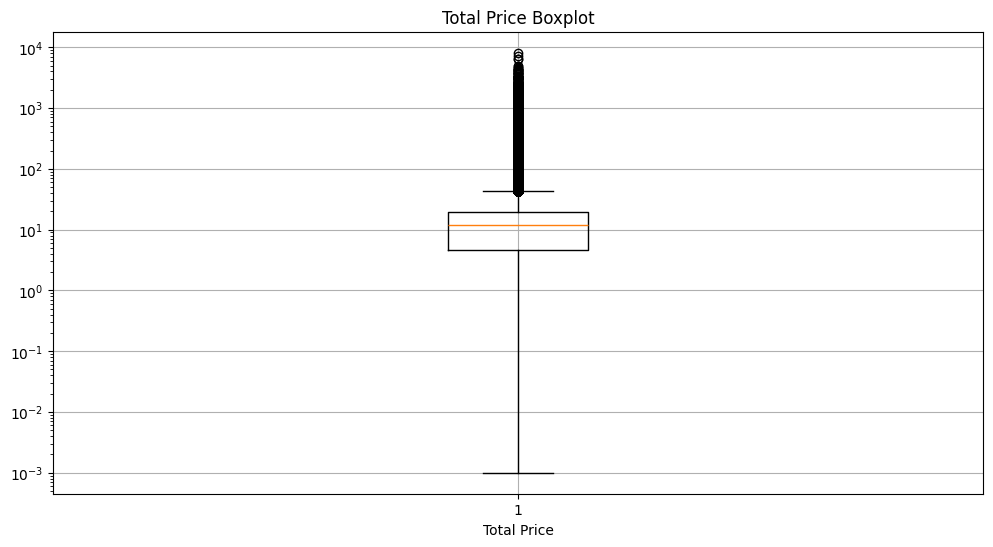

In [ ]:
#analysis if there is a outlier that we have to remove
fig = plt.subplots(figsize=(12, 6))

plt.boxplot(df['TotalPrice'], orientation='vertical')

plt.xlabel('Total Price')
plt.title('Total Price Boxplot')
plt.grid(True)
plt.yscale('log')
plt.show()

In [ ]:
df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

,Quantity
Country,
United Kingdom,4101470
Netherlands,200361
Eire,140275
Germany,119261
France,111471
Australia,83901
Sweden,36083
Switzerland,30082
Spain,27940


In [ ]:
upl = files.upload()
df = pd.read_excel('Dados_Varejo(1).xlsx')

Saving Dados_Varejo(1).xlsx to Dados_Varejo(1).xlsx


In [ ]:
#Creating a database without the United Kingdom category
df_semUK = df.loc[df['Country'] != 'United Kingdom', ['Country', 'Quantity']]
df_semUK.head()

,Country,Quantity
26,France,24
27,France,24
28,France,12
29,France,12
30,France,24


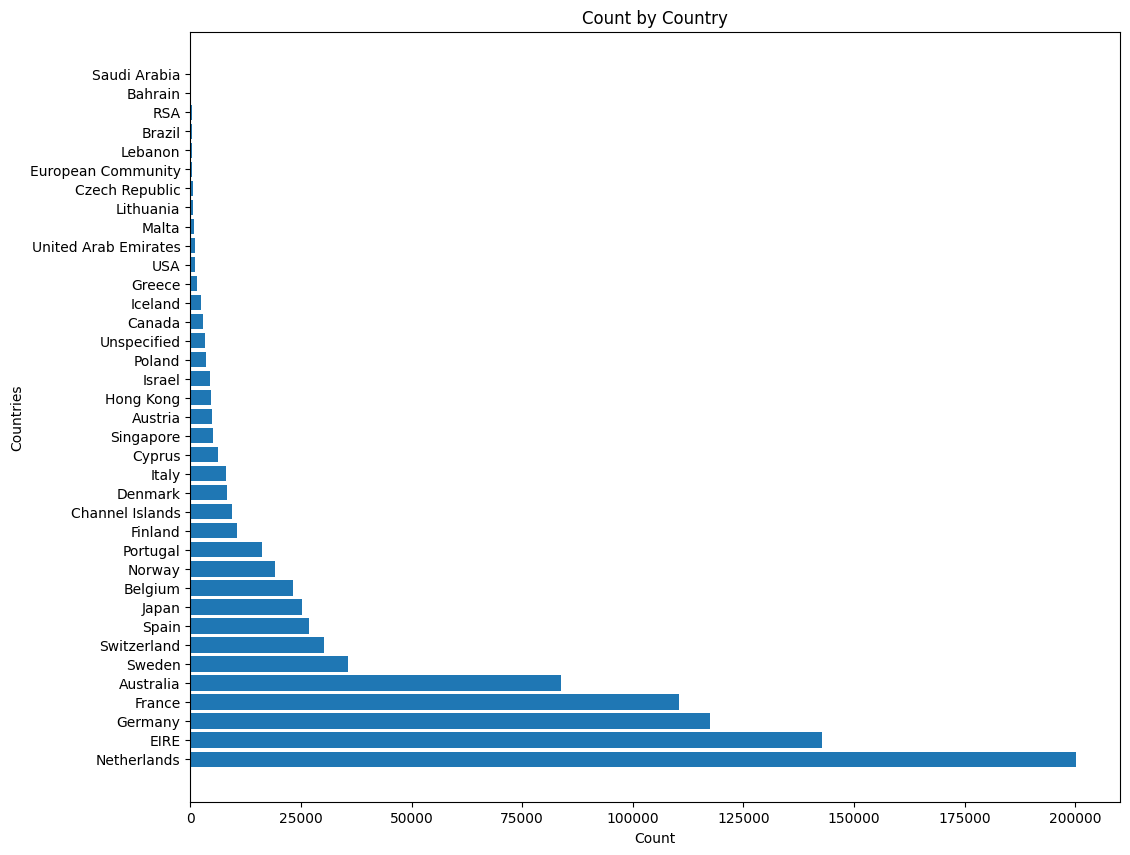

In [ ]:
#Total sales by country
fig, ax = plt.subplots(figsize=(12, 10))

plt.barh(df_semUK.groupby('Country')['Quantity'].sum().sort_values(ascending=False).index,
         df_semUK.groupby('Country')['Quantity'].sum().sort_values(ascending=False).values)

ax.set_xlabel('Count')
ax.set_ylabel('Countries')
ax.set_title('Count by Country')

plt.show()

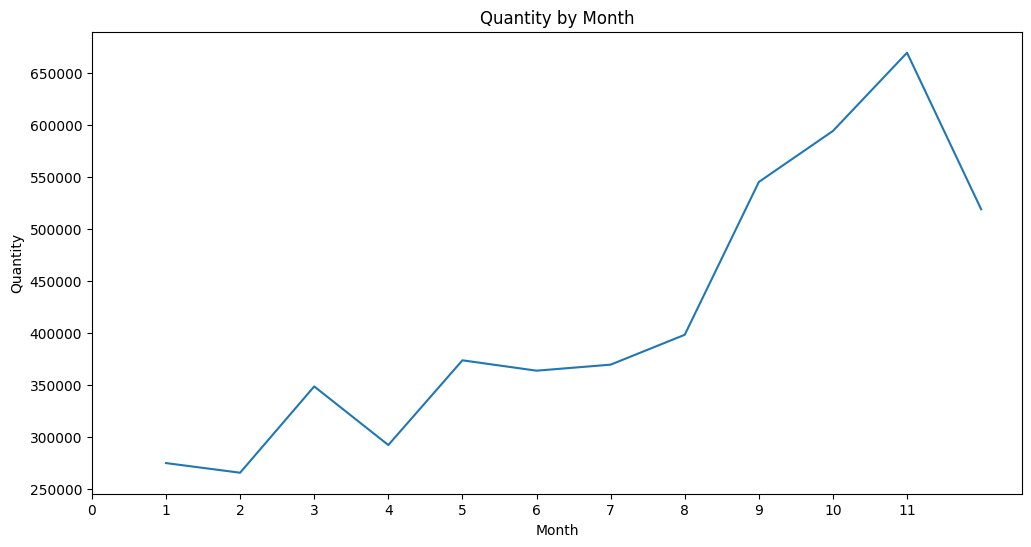

In [ ]:
#What is the total sales per month?
fig, ax = plt.subplots(figsize=(12, 6))

df.groupby('Month')['Quantity'].sum()

plt.plot(df.groupby('Month')['Quantity'].sum().index, df.groupby('Month')['Quantity'].sum().values)

ax.set_xlabel('Month')
ax.set_ylabel('Quantity')
ax.set_title('Quantity by Month')

ax.set_xticks(range(0, 12, 1))

plt.show()

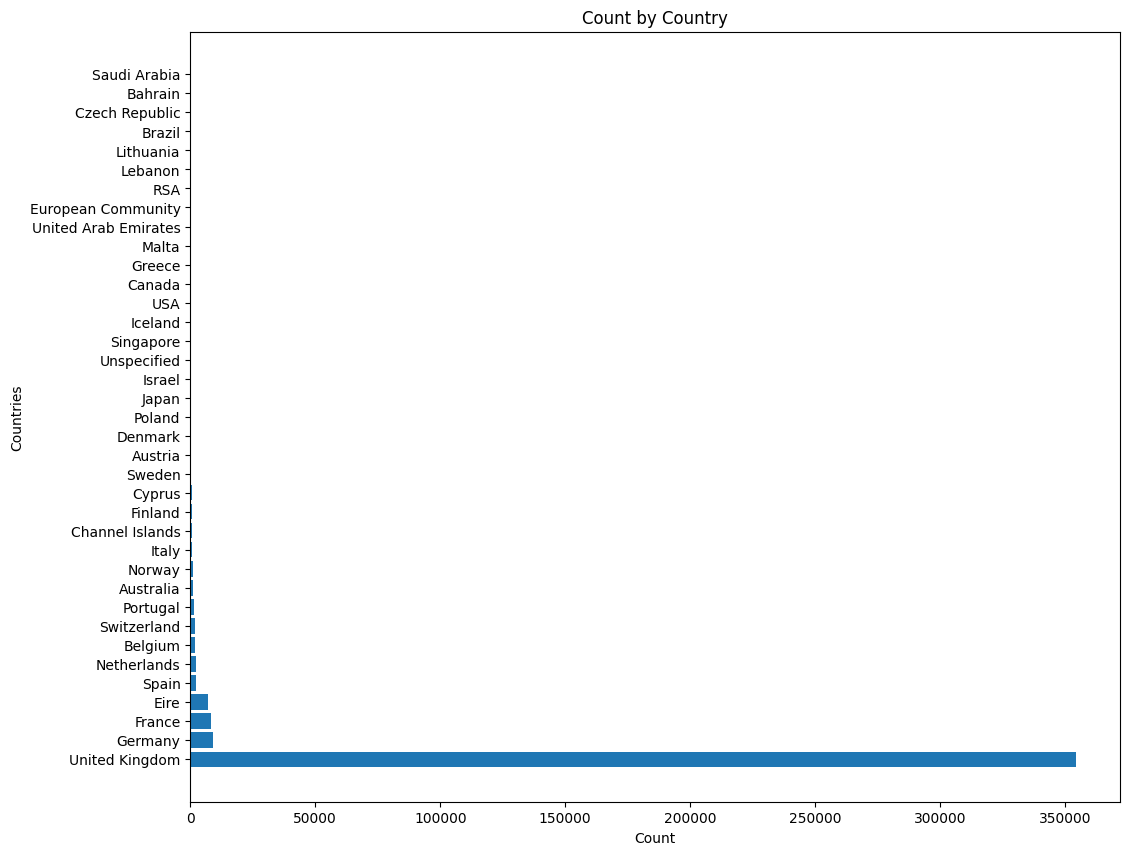

In [ ]:
#Vertical bars to check the most immersive countries. Which countries do your customers come from?

#CORRIGIR CÓDIGO (PODE TER UM CLIENTE QUE COMPROU MAIS DE UMA VEZ)
fig, ax = plt.subplots(figsize=(12, 10))

plt.barh(df['Country'].value_counts().index, df['Country'].value_counts().values)

ax.set_xlabel('Count')
ax.set_ylabel('Countries')
ax.set_title('Count by Country')

plt.show()

In [ ]:
df.groupby('Month')['TotalPrice'].sum()

,TotalPrice
Month,
1,569445.040
2,447137.350
3,595500.760
4,469200.361
5,678594.560
6,661213.690
7,600091.011
8,645343.900
9,952838.382


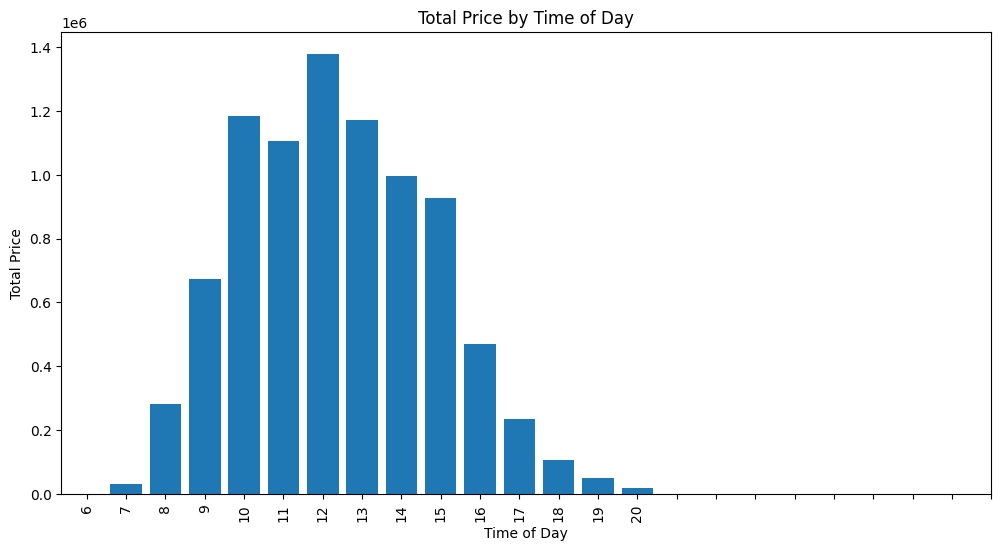

In [ ]:
#What time of day have the most orders?
fig, ax = plt.subplots(figsize=(12, 6))

df.groupby('Hour')['TotalPrice'].sum().plot(kind='bar', ax=ax, width=0.8)

ax.set_xlabel('Time of Day')
ax.set_ylabel('Total Price')
ax.set_title('Total Price by Time of Day')

ax.set_xticks(range(0, 24, 1))

plt.show()

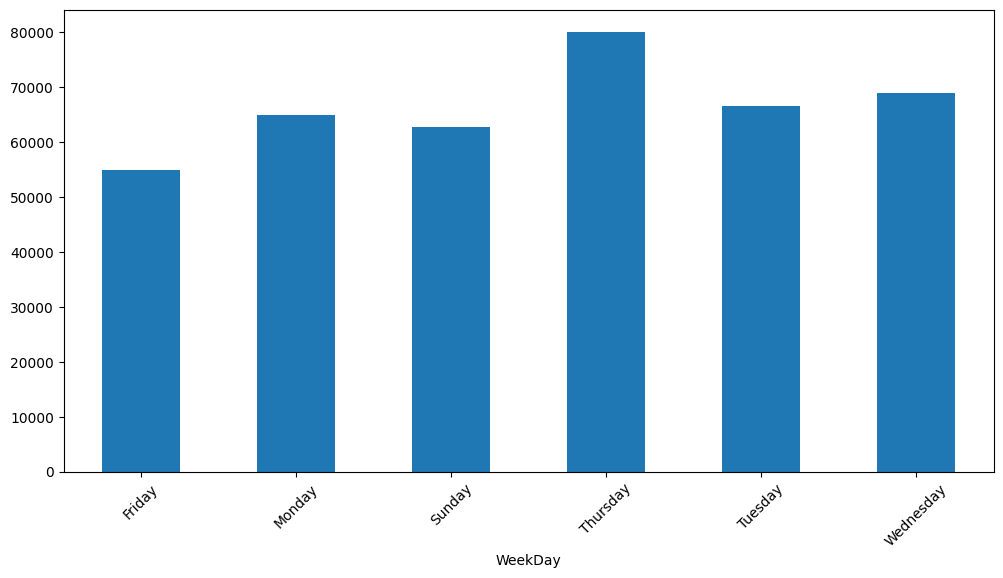

In [ ]:
#What day of the week has the highest sales volume?
fig, ax = plt.subplots(figsize=(12, 6))
df.groupby('WeekDay')['Count'].sum().plot(kind='bar', ax=ax)

plt.xticks(rotation=45)

plt.show()

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,Month,Day,Year,Hour,Count
count,397884.000000,397884,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.0
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000,7.612475,15.042186,2010.934260,12.728202,1.0
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000,1.000000,1.000000,2010.000000,6.000000,1.0
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000,5.000000,7.000000,2011.000000,11.000000,1.0
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000,8.000000,15.000000,2011.000000,13.000000,1.0
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000,11.000000,22.000000,2011.000000,14.000000,1.0
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000,12.000000,31.000000,2011.000000,20.000000,1.0
std,179.331775,NaN,22.097877,1713.141560,309.071041,3.416520,8.653746,0.247828,2.273519,0.0


In [ ]:
for column_name in df.columns:
  print(column_name)
  #variable name

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country
TotalPrice
Month
Day
Year
TimeOfDay
Hour
Count
WeekDay


In [ ]:
df['Country'].value_counts()

,count
Country,
United Kingdom,354321
Germany,9040
France,8341
Eire,7236
Spain,2484
Netherlands,2359
Belgium,2031
Switzerland,1841
Portugal,1462


In [ ]:
#10 best-selling items
df_item = df['Description'].value_counts()

df_item.head(10)

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2028
REGENCY CAKESTAND 3 TIER,1723
JUMBO BAG RED RETROSPOT,1618
ASSORTED COLOUR BIRD ORNAMENT,1408
PARTY BUNTING,1396
LUNCH BAG RED RETROSPOT,1316
SET OF 3 CAKE TINS PANTRY DESIGN,1159
LUNCH BAG BLACK SKULL.,1105
POSTAGE,1099


In [ ]:
#10 highest-grossing products
df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

,TotalPrice
Description,
REGENCY CAKESTAND 3 TIER,142592.95
WHITE HANGING HEART T-LIGHT HOLDER,100448.15
JUMBO BAG RED RETROSPOT,85220.78
POSTAGE,77803.96
PARTY BUNTING,68844.33
ASSORTED COLOUR BIRD ORNAMENT,56580.34
Manual,53779.93
RABBIT NIGHT LIGHT,51346.20
CHILLI LIGHTS,46286.51


# Customer Segmentation

In [ ]:
upl = files.upload()
df = pd.read_excel('Dados_Varejo_clean.xlsx')

Saving Dados_Varejo_clean.xlsx to Dados_Varejo_clean.xlsx


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Day,Year,TimeOfDay,Hour,Count,WeekDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,2010,08:26:00,8,1,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,2010,08:26:00,8,1,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,1,2010,08:26:00,8,1,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,2010,08:26:00,8,1,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,2010,08:26:00,8,1,Wednesday


In [ ]:
#Below, we will use the split-apply-combine technique to segment the database in the RFM model

In [ ]:
reference_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)
print(reference_date)

2011-12-10 12:50:00


In [ ]:
recency_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days
    }).rename(columns = {'InvoiceDate': 'Recency'})

recency_df.head()

,Recency
CustomerID,
12346,326
12347,2
12348,75
12349,19
12350,310


In [ ]:
frequency_df = df.groupby('CustomerID').agg(
    {'InvoiceNo' : 'nunique'}
).rename(columns = {'InvoiceNo': 'Frequency'})

frequency_df.head()

,Frequency
CustomerID,
12346,1
12347,7
12348,4
12349,1
12350,1


In [ ]:
Monetary_df = df.groupby('CustomerID').agg({
    'TotalPrice': 'sum'
}).rename(columns = {'TotalPrice': 'Monetary'})

Monetary_df.head()

,Monetary
CustomerID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40


In [ ]:
df_RFM = pd.concat([recency_df, frequency_df, Monetary_df], axis=1)

df_RFM.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


In [ ]:
#data base Standardization
scaler = StandardScaler()

df_RFM_scaled = scaler.fit_transform(df_RFM)

print(df_RFM_scaled)

df_RFM_scaled = pd.DataFrame(df_RFM_scaled, columns=df_RFM.columns, index=df_RFM.index)

df_RFM_scaled.head()

[[ 2.33457414e+00 -4.25096503e-01  8.35866818e+00]
 [-9.05340320e-01  3.54416797e-01  2.50966264e-01]
 [-1.75359593e-01 -3.53398530e-02 -2.85960063e-02]
 ...
 [-8.45341904e-01 -2.95177619e-01 -2.08742313e-01]
 [-8.85340848e-01  1.52368675e+00  4.51854273e-03]
 [-4.95351144e-01 -1.65258736e-01 -2.41412739e-02]]


,Recency,Frequency,Monetary
CustomerID,,,
12346,2.334574,-0.425097,8.358668
12347,-0.905340,0.354417,0.250966
12348,-0.175360,-0.035340,-0.028596
12349,-0.735345,-0.425097,-0.033012
12350,2.174578,-0.425097,-0.191347


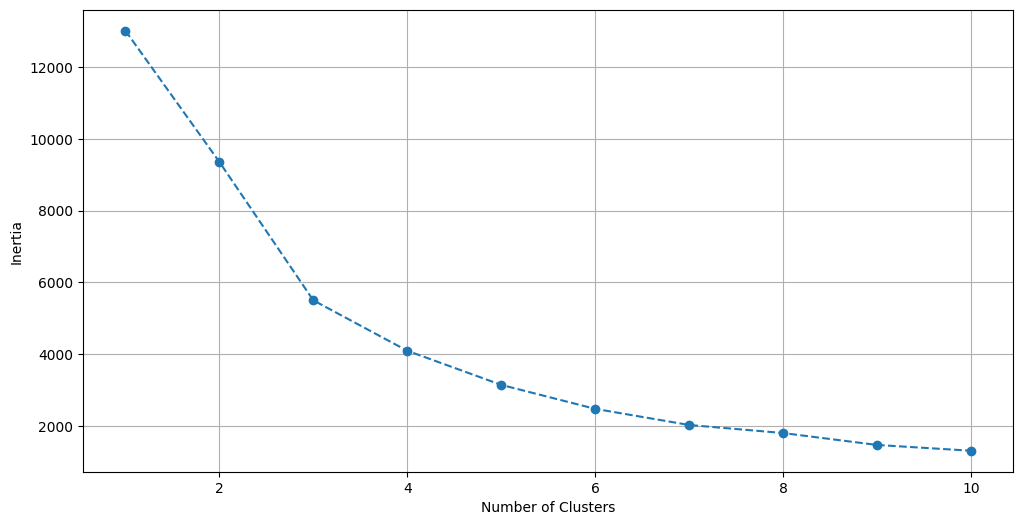

In [ ]:
#elbow method to find out the best number of K
inertia = []

for i in range (1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans = kmeans.fit(df_RFM_scaled)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1,11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)

In [ ]:
greaterK = 4

kmeans = KMeans(n_clusters=greaterK, init='k-means++', random_state=42)
kmeans.fit(df_RFM_scaled)
clusters = kmeans.predict(df_RFM_scaled) #labels

df_RFM_scaled['Cluster'] = clusters
df_RFM['Cluster'] = clusters

df_RFM['Cluster'] = df_RFM['Cluster'].map({
    3: 'VIP',
    2: 'Campeões',
    1: 'Risco/Perdidos',
    0: 'Perenes'
})

df_RFM.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346,326,1,77183.60,VIP
12347,2,7,4310.00,Perenes
12348,75,4,1797.24,Perenes
12349,19,1,1757.55,Perenes
12350,310,1,334.40,Risco/Perdidos


In [ ]:
df_RFM['Cluster'].value_counts()

,count
Cluster,
Perenes,3054
Risco/Perdidos,1067
VIP,204
Campeões,13


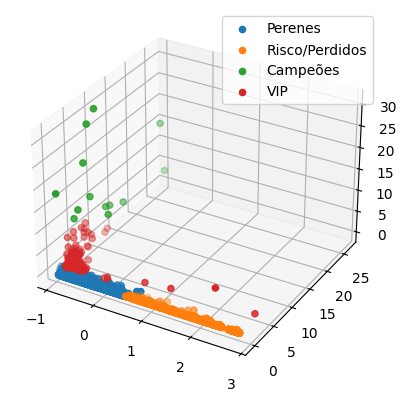

In [ ]:
#plotting clusters

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i, j in {0: 'Perenes', 1: 'Risco/Perdidos', 2: 'Campeões', 3: 'VIP'}.items():
  cluster = df_RFM_scaled[df_RFM_scaled['Cluster'] == i]
  ax.scatter(cluster['Recency'], cluster['Frequency'], cluster['Monetary'], label=j)
ax.legend()

In [ ]:
cluster_analysis = df_RFM.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(1)

#the cluster segmentation
cluster_analysis.head()

,Recency,Frequency,Monetary
Cluster,,,
Campeões,7.4,82.5,127338.3
Perenes,43.7,3.7,1359.0
Risco/Perdidos,248.1,1.6,480.6
VIP,15.5,22.3,12709.1


# Statistical tests


In [ ]:
#upload the file
upl = files.upload()
df = pd.read_excel('Dados_Varejo_clean.xlsx')

Saving Dados_Varejo_clean.xlsx to Dados_Varejo_clean.xlsx


In [ ]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Day,Year,TimeOfDay,Hour,Count,WeekDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,2010,08:26:00,8,1,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,2010,08:26:00,8,1,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,1,2010,08:26:00,8,1,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,2010,08:26:00,8,1,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,2010,08:26:00,8,1,Wednesday


First, we gonna do a chi-squared test. The goal is to analysis if the hyphotesis: "Exist a relation between day week and the probability of a purchase have a expensive merchandise?" is true or false

In [ ]:
df['ExpMerchandise'] = df['UnitPrice'] > 10

In [ ]:
df_contingency = pd.crosstab(df['ExpMerchandise'], df['WeekDay'])

df_contingency.head()

WeekDay,Friday,Monday,Sunday,Thursday,Tuesday,Wednesday
ExpMerchandise,,,,,,
False,53261,62935,61475,77616,64798,66936
True,1564,1958,1298,2419,1675,1949


In [ ]:
from scipy.stats import chi2_contingency

chi2, pvalue, dof, expected = chi2_contingency(df_contingency)

print("-"*90)
print(f"Chi-square value: {chi2: .2f}")
print(f"P-value: {pvalue: .2f}")
print(f"Degrees of fredoom: {dof}")
print("-"*90)

expected_df = pd.DataFrame(expected, columns=df_contingency.columns, index=df_contingency.index)

if pvalue < 0.05:
  print("Reject the null hypothesis")
  print()
  print("There exist evidence of an association statistically significant between the variables")
else:
  print("Fail to reject the null hypothesis")
  print(" ")
  print("There is not exist evidence of an association statistically significant between the variables")
print("-"*90)
print('contingency table expected')
print()
expected_df.head()


------------------------------------------------------------------------------------------
Chi-square value:  166.33
P-value:  0.00
Degrees of fredoom: 5
------------------------------------------------------------------------------------------
Reject the null hypothesis

There exist evidence of an association statistically significant between the variables
------------------------------------------------------------------------------------------
contingency table expected



WeekDay,Friday,Monday,Sunday,Thursday,Tuesday,Wednesday
ExpMerchandise,,,,,,
False,53328.171842,63121.296039,61059.176124,77849.890257,64658.158994,67004.306745
True,1496.828158,1771.703961,1713.823876,2185.109743,1814.841006,1880.693255


Furthermore, we will now perform a Student's t-test to classify the hypothesis: "Is the average amount spent per transaction by customers from Germany significantly different from the average amount spent by customers from France?"

In [ ]:
df_copy = df
df_copy = df_copy[df_copy['Country'] == 'Germany']

df_germany = pd.crosstab(df_copy['TotalPrice'], df_copy['Country'])

In [ ]:
df_copy2 = df
df_copy2 = df_copy2[df_copy2['Country'] == 'France']

df_france = pd.crosstab(df_copy2['TotalPrice'], df_copy2['Country'])

In [ ]:
from scipy import stats

t, pvalue = stats.ttest_ind(df_germany['Germany'], df_france['France'])

print("-"*90)
print(f"t-value: {t: .2f}")
print(f"P-value: {pvalue: .2f}")
print("-"*90)

if pvalue < 0.05:
  print("Reject the null hypothesis")
  print()
  print("There exist evidence of an association statistically significant between the variables")
else:
  print("Fail to reject the null hypothesis")
  print(" ")
  print("There is not exist evidence of an association statistically significant between the variables")

------------------------------------------------------------------------------------------
t-value:  0.14
P-value:  0.89
------------------------------------------------------------------------------------------
Fail to reject the null hypothesis
 
There is not exist evidence of an association statistically significant between the variables


# 1. Predictive Analytics(MACHINE LEARNING)


Here, we're going to prepare a machine learning model to forecast churn and total amount a customer will spend in the next 3 months

# 1.1 Churn prediction


In [ ]:
#database upload
upl = files.upload()
df = pd.read_excel('Dados_Varejo_clean.xlsx')

Saving Dados_Varejo_clean.xlsx to Dados_Varejo_clean.xlsx


Foremost, we will define what is a churn customer

In [ ]:
pip install -U imbalanced-learn

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Day,Year,TimeOfDay,Hour,Count,WeekDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,2010,08:26:00,8,1,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,2010,08:26:00,8,1,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,1,2010,08:26:00,8,1,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,2010,08:26:00,8,1,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,2010,08:26:00,8,1,Wednesday


In [ ]:
reference_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)
print(reference_date)

2011-12-10 12:50:00


In [ ]:
recency_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days
    }).rename(columns = {'InvoiceDate': 'Recency'})

In [ ]:
recency_df['churn'] = recency_df['Recency'] > 90

recency_df['churn'] = recency_df['churn'].map({True: 1, False: 0})

recency_df.head()


,Recency,churn
CustomerID,,
12347,2,0
12348,75,0
12349,19,0
12350,310,1
12352,36,0


In [ ]:
df_attribute = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns = {
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})

df_attribute.head()

,Frequency,Monetary
CustomerID,,
12347,7,4310.00
12348,4,1797.24
12349,1,1757.55
12350,1,334.40
12352,8,2506.04


In [ ]:
df_attribute = df_attribute.merge(recency_df, left_index=True, right_index=True)

df_attribute.head()

,Frequency,Monetary,Recency,churn
CustomerID,,,,
12347,7,4310.00,2,0
12348,4,1797.24,75,0
12349,1,1757.55,19,0
12350,1,334.40,310,1
12352,8,2506.04,36,0


In [ ]:
df_mean = df.groupby('CustomerID').agg({
    'Quantity': 'mean',
    'UnitPrice': 'mean',
}).rename(columns = {
    'Quantity': 'MeanQuantity',
    'UnitPrice': 'MeanUnitPrice'
})

In [ ]:
#the dataframe that merge a lot of customers attributes
df_attribute = df_attribute.merge(df_mean, left_index=True, right_index=True)

In [ ]:
df_attribute.head()

,Frequency,Monetary,Recency,churn,MeanQuantity,MeanUnitPrice
CustomerID,,,,,,
12347,7,4310.00,2,0,13.505495,2.644011
12348,4,1797.24,75,0,75.516129,5.764839
12349,1,1757.55,19,0,8.643836,8.289041
12350,1,334.40,310,1,11.588235,3.841176
12352,8,2506.04,36,0,6.305882,15.930706


In [ ]:
df_attribute['churn'].value_counts()

,count
churn,
0,2888
1,1449


In [ ]:
df_attribute = df_attribute.reset_index()

In [ ]:
X = df_attribute.drop(['churn', 'CustomerID'], axis=1)
y = df_attribute['churn']

In [ ]:
#cutting the train and sample group
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print(f"\nTamanho da base de treino: {X_train.shape[0]} amostras")
print(f"Tamanho da base de teste: {X_test.shape[0]} amostras")


Tamanho da base de treino: 4014 amostras
Tamanho da base de teste: 1302 amostras


In [ ]:
#Data Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

accuracy score: 0.999231950844854
------------------------------------------------------------------------------------------
classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       881
           1       1.00      1.00      1.00       421

    accuracy                           1.00      1302
   macro avg       1.00      1.00      1.00      1302
weighted avg       1.00      1.00      1.00      1302

------------------------------------------------------------------------------------------
Confusion Matrix



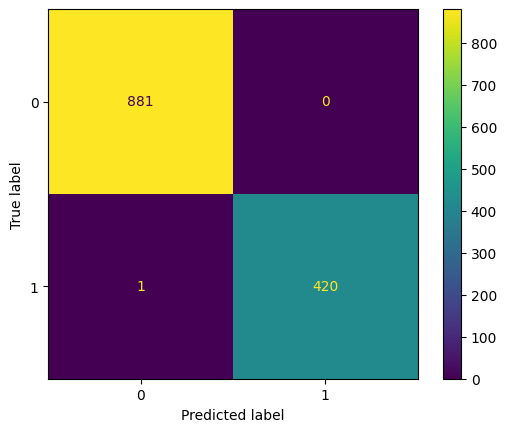

In [ ]:
#Logistic Regression and model metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'accuracy score: {accuracy_score(y_test, y_pred)}')
print('-'*90)
print('classification report')
print()
print(classification_report(y_test, y_pred))
print('-'*90)
print('Confusion Matrix')
print()
_ = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

Now, we will train models more advantage, like random forest classifier

accuracy score: 1.0
------------------------------------------------------------------------------------------
classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       881
           1       1.00      1.00      1.00       421

    accuracy                           1.00      1302
   macro avg       1.00      1.00      1.00      1302
weighted avg       1.00      1.00      1.00      1302

------------------------------------------------------------------------------------------
Confusion Matrix



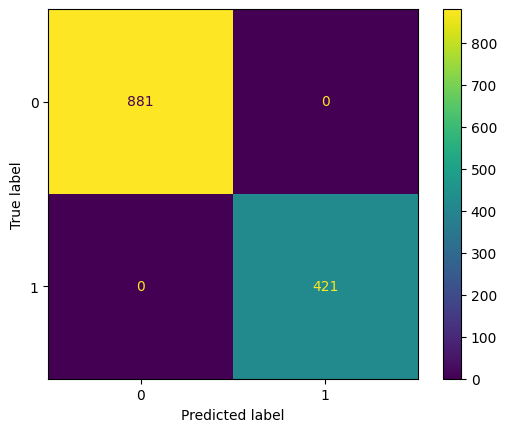

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(random_state=42, n_estimators = 500)
modelRF.fit(X_train, y_train)

y_predd = modelRF.predict(X_test)

# ... imprima os relatórios ...
print(f'accuracy score: {accuracy_score(y_test, y_predd)}')
print('-'*90)
print('classification report')
print()
print(classification_report(y_test, y_predd))
print('-'*90)
print('Confusion Matrix')
print()
_ = ConfusionMatrixDisplay.from_estimator(modelRF, X_test, y_test)

accuracy score: 1.0
------------------------------------------------------------------------------------------
classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       881
           1       1.00      1.00      1.00       421

    accuracy                           1.00      1302
   macro avg       1.00      1.00      1.00      1302
weighted avg       1.00      1.00      1.00      1302

------------------------------------------------------------------------------------------
Confusion Matrix



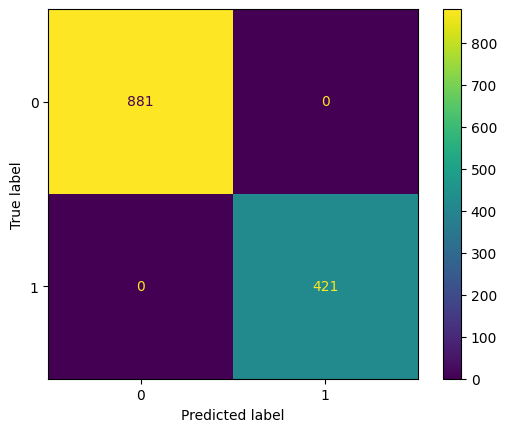

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

modelGB = GradientBoostingClassifier(random_state=42)
modelGB.fit(X_train, y_train)

y_predgb = modelGB.predict(X_test)

print(f'accuracy score: {accuracy_score(y_test, y_predgb)}')
print('-'*90)
print('classification report')
print()
print(classification_report(y_test, y_predd))
print('-'*90)
print('Confusion Matrix')
print()
_ = ConfusionMatrixDisplay.from_estimator(modelGB, X_test, y_test)

In [ ]:
df_attribute_copy = df_attribute[df_attribute['churn'] != 1]

df_attribute_copy.head()

,CustomerID,Frequency,Monetary,Recency,churn,MeanQuantity,MeanUnitPrice
0,12347,7,4310.00,2,0,13.505495,2.644011
1,12348,4,1797.24,75,0,75.516129,5.764839
2,12349,1,1757.55,19,0,8.643836,8.289041
4,12352,8,2506.04,36,0,6.305882,15.930706
8,12356,3,2811.43,23,0,26.966102,3.201186


In [ ]:
df_attribute_copy = df_attribute_copy.drop(['churn', 'CustomerID'], axis=1)

In [ ]:
probabilidades = modelRF.predict_proba(df_attribute_copy)
print(f"Probabilidades de Churn: \n{probabilidades}")
print('-'*90)

probabilidades = pd.DataFrame(probabilidades, columns=['Probabilidade Não Churn', 'Probabilidade Churn'])

previsoes = modelRF.predict(df_attribute_copy)
print(f"Previsões de Churn (1 = Sim, 0 = Não): {previsoes}")

prob = probabilidades[probabilidades['Probabilidade Churn'] > 0.2]

prob.head()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Probabilidades de Churn: 
[[0.082 0.918]
 [0.078 0.922]
 [0.046 0.954]
 ...
 [0.08  0.92 ]
 [0.078 0.922]
 [0.078 0.922]]
------------------------------------------------------------------------------------------
Previsões de Churn (1 = Sim, 0 = Não): [1 1 1 ... 1 1 1]


,Probabilidade Não Churn,Probabilidade Churn
0,0.082,0.918
1,0.078,0.922
2,0.046,0.954
3,0.082,0.918
4,0.078,0.922


In [ ]:
probabilidades_RL = model.predict_proba(df_attribute_copy)
print(f"Probabilidades de Churn: \n{probabilidades_RL}")
print('-'*90)

probabilidades_RL = pd.DataFrame(probabilidades_RL, columns=['Probabilidade Não Churn', 'Probabilidade Churn'])

probabilidades_RL = probabilidades_RL[probabilidades_RL['Probabilidade Churn'] > 0.2]

probabilidades_RL.head()

Probabilidades de Churn: 
[[1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 1.99963832e-212]
 [1.00000000e+000 0.00000000e+000]
 ...
 [1.00000000e+000 2.77895366e-017]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000]]
------------------------------------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Probabilidade Não Churn,Probabilidade Churn
17,0.0,1.0
22,0.0,1.0
29,0.0,1.0
35,0.0,1.0
38,0.0,1.0


In [ ]:
probabilidades_GB = modelGB.predict_proba(df_attribute_copy)
print('-'*90)

probabilidades_GB = pd.DataFrame(probabilidades_GB, columns=['Probabilidade Não Churn', 'Probabilidade Churn'])

probabilidades_GB = probabilidades_GB[probabilidades_GB['Probabilidade Churn'] > 0.2]

probabilidades_GB.head()

------------------------------------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


,Probabilidade Não Churn,Probabilidade Churn
0,0.000022,0.999978
1,0.000022,0.999978
2,0.000022,0.999978
3,0.000022,0.999978
4,0.000022,0.999978


In [ ]:
#Here, we find out a fail in the model, the column 'recency' tell the true to the model and, hence it doesnt learn
Xtrain = pd.DataFrame(X_train, columns=X.columns)
feature_importances = pd.DataFrame({
    'feature': Xtrain.columns,
    'importance': modelRF.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importances)

         feature  importance
2        Recency    0.873288
0      Frequency    0.072331
1       Monetary    0.038930
4  MeanUnitPrice    0.011386
3   MeanQuantity    0.004064


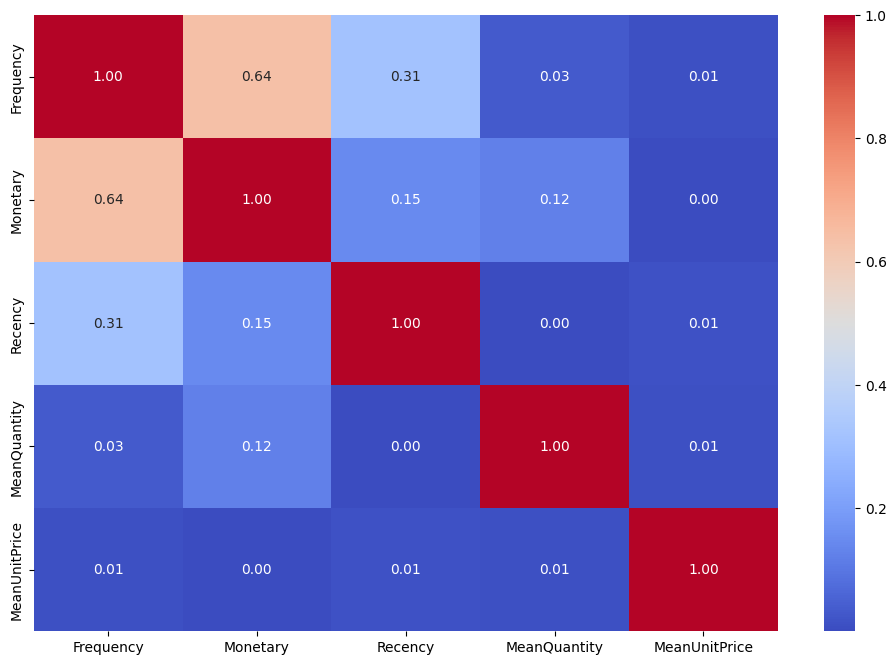

In [ ]:
import seaborn as sns

# Calcule a matriz de correlação
corr_matrix = Xtrain.corr().abs()

# Plote um heatmap para visualizar
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# 1.2 Forecast of Amount Spent

Now, we will forecast the amount spend in te next 3 months

In [ ]:
#upload the file
upl = files.upload()
df = pd.read_excel('Dados_Varejo_clean.xlsx')

Saving Dados_Varejo_clean.xlsx to Dados_Varejo_clean (1).xlsx


In [ ]:
#the target will be the amout spent in the last three months
reference_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)

df_target = df[df['Month'] > 9]
df_target = df_target.groupby('CustomerID').agg({
    'TotalPrice': 'sum'
}).rename(columns = {'TotalPrice': 'Target'})

df_target = df_target.reset_index()
print(df_target)

      CustomerID   Target
0          12347  2230.93
1          12348   892.80
2          12349  1757.55
3          12352   311.73
4          12356    58.35
...          ...      ...
2856       18276   335.86
2857       18277   110.38
2858       18282    77.84
2859       18283   974.21
2860       18287  1072.00

[2861 rows x 2 columns]


In [ ]:
df_features = df[df['Month'] <= 9]
df_features.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Day,Year,TimeOfDay,Hour,Count,WeekDay
26157,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,19.5,1,4,2011,10:00:00,10,1,Tuesday
26158,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5,1,4,2011,10:00:00,10,1,Tuesday
26159,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5,1,4,2011,10:00:00,10,1,Tuesday
26160,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,10.5,1,4,2011,10:00:00,10,1,Tuesday
26161,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,12.5,1,4,2011,10:00:00,10,1,Tuesday


In [ ]:
df_features = df_features.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'TotalPrice': 'sum'
}).rename(columns = {
    'Quantity': 'Frequency',
    'UnitPrice': 'MeanUnitPrice',
    'TotalPrice': 'Monetary'
})
df_features = df_features.reset_index()
print(df_features)

      CustomerID  Frequency  MeanUnitPrice  Monetary
0          12347       1271       2.766882   2079.07
1          12348       1087       9.222143    904.44
2          12350        197       3.841176    334.40
3          12352        409      18.108286   2194.31
4          12353         20       6.075000     89.00
...          ...        ...            ...       ...
3432       18280         45       4.765000    180.60
3433       18281         54       5.622857     80.82
3434       18282         75       5.552857    100.21
3435       18283        742       1.685257   1120.67
3436       18287        488       1.962759    765.28

[3437 rows x 4 columns]


In [ ]:
df_intersection = df_features.merge(df_target, on='CustomerID', how='inner')
print(df_intersection)

      CustomerID  Frequency  MeanUnitPrice  Monetary   Target
0          12347       1271       2.766882   2079.07  2230.93
1          12348       1087       9.222143    904.44   892.80
2          12352        409      18.108286   2194.31   311.73
3          12356       1586       2.897719   2753.08    58.35
4          12358        100       7.719167    484.86   683.20
...          ...        ...            ...       ...      ...
1956       18272       1465       2.146316   2106.45   972.13
1957       18273         60       2.550000    153.00    51.00
1958       18282         75       5.552857    100.21    77.84
1959       18283        742       1.685257   1120.67   974.21
1960       18287        488       1.962759    765.28  1072.00

[1961 rows x 5 columns]
